In [2]:
# Python
import pandas as pd
from fbprophet import Prophet

In [4]:
df = pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [5]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [7]:
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33503 entries, 2019-10-01 00:15:00 to 2020-09-13 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       33503 non-null  float64
dtypes: float64(1)
memory usage: 523.5 KB


In [9]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [11]:
df_day.head()

,ds,y
0,2019-10-01,77324.7
1,2019-10-02,76038.6
2,2019-10-03,76977.6
3,2019-10-04,77042.7
4,2019-10-05,77223.0


In [12]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [13]:
df_day.drop(df_day.index[336], inplace=True)

In [14]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [15]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df_day)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [22]:
future = m.make_future_dataframe(200, freq='D') # Forecasting 7 days
future.tail()

,ds
543,2021-03-28
544,2021-03-29
545,2021-03-30
546,2021-03-31
547,2021-04-01


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
538,2021-03-23,79364.042866,77854.460466,80895.441023
539,2021-03-24,79411.931970,77885.050596,81085.607126
540,2021-03-25,79326.932255,77780.465554,80874.746991
541,2021-03-26,79167.347324,77661.610057,80720.298399
542,2021-03-27,79028.731118,77433.190549,80622.744628
543,2021-03-28,78936.588799,77406.600274,80528.140948
544,2021-03-29,78867.540043,77325.253255,80360.710330
545,2021-03-30,79093.613540,77582.423440,80566.951601
546,2021-03-31,79207.075525,77632.974048,80706.712545
547,2021-04-01,79189.321111,77730.059186,80847.394630


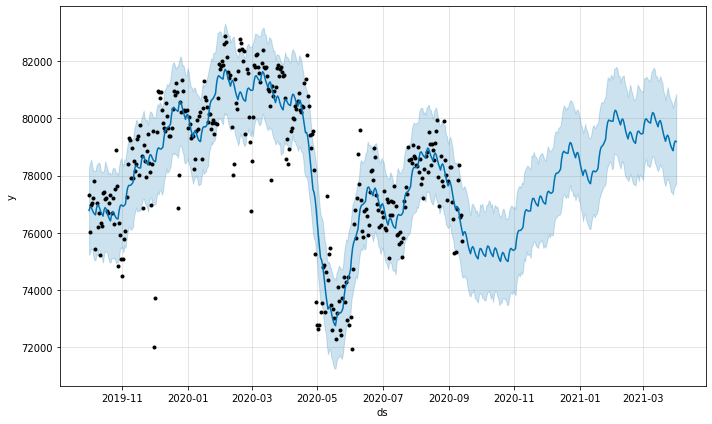

In [24]:
fig1 = m.plot(forecast)

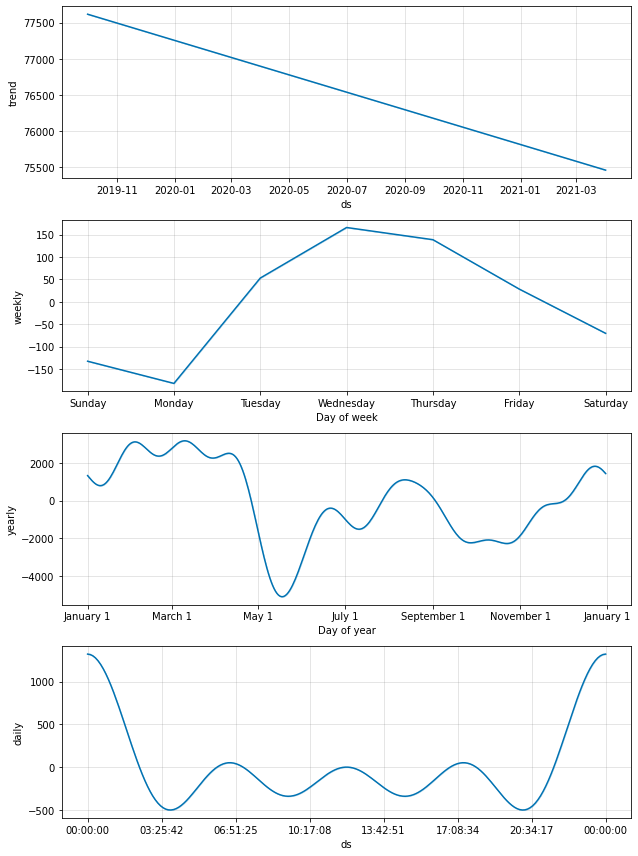

In [25]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

#py.init_notebook_mode(connected=True)
py.offline.init_notebook_mode(connected=True)
#py.init_notebook_mode()

In [ ]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure

py.iplot(fig)